# Figure 10: Durability

## Load session data

In [2]:
from chi import ssh
import scripts.session as session
import scripts.ssh_helper as ssh_helper

session_data = session.load()
floating_ip = session_data["floating_ip"]
print("Got floating_ip: {}".format(floating_ip))

Got floating_ip: 129.114.109.238


## Experiment

In [8]:
with ssh.Remote(floating_ip) as conn:
    print("Now we run the experiments for Figure 10")
    conn.run("source ~/.bashrc && cd sc23-mlec/scripts/fig10 && tmux new-session -d -s fig10-session 'bash exp.sh &> fig10.log; tmux kill-session -t fig10-session'")
    print("Experiments are now running in the background using tmux.")
    print("This can take roughly 3-4 hours. You don't need to keep your laptop on during this process. However, we suggest you don't close this webpage, so that you can connect to this workspace later.")

Now we run the experiments for Figure 10
Experiments are now running in the background using tmux.
This can take roughly 3-4 hours. You don't need to keep your laptop on during this process. However, we suggest you don't close this webpage, so that you can connect to this workspace later.


## Wait for results

Experiments are now running in the background using tmux.

You can use the code below to check if the experiments have finished or not:

In [2]:
from chi import ssh
import scripts.session as session
import scripts.ssh_helper as ssh_helper
import time

session_data = session.load()
floating_ip = session_data["floating_ip"]
print("Got floating_ip: {}".format(floating_ip))

print("Checking the status of the experiments....")

with ssh.Remote(floating_ip) as conn:
    curr = int(time.time())
    log_temp_path = "/tmp/tmux_sessions_{}.log".format(curr)
    conn.run("tmux list-sessions &> {}".format(log_temp_path), warn=True)
    conn.get(log_temp_path, log_temp_path)
    with open(log_temp_path, "r") as file:
        tmux_sessions = file.read()
    if "fig10-session" in tmux_sessions:
        print("Experiments are still running... Please wait....")
    else:
        print("Experiments have finished! You can now fetch results and make plots")

Got floating_ip: 129.114.109.238
Checking the status of the experiments....
Experiments have finished! You can now fetch results and make plots


## Fetch results

After the experiments are finished, you can retrive results from remote server to this container

In [3]:
from chi import ssh
import scripts.session as session
import scripts.ssh_helper as ssh_helper
import time

session_data = session.load()
floating_ip = session_data["floating_ip"]

!mkdir -p data/fig10
with ssh.Remote(floating_ip) as conn:
    conn.get("/home/cc/mlec-sim/src/scheme-0.dat", "data/fig10/scheme-0.dat")
    conn.get("/home/cc/mlec-sim/src/scheme-1.dat", "data/fig10/scheme-1.dat")
    conn.get("/home/cc/mlec-sim/src/scheme-2.dat", "data/fig10/scheme-2.dat")
    conn.get("/home/cc/mlec-sim/src/scheme-3.dat", "data/fig10/scheme-3.dat")
    

## Plotting

We now plot Figure 10 based on simulation results

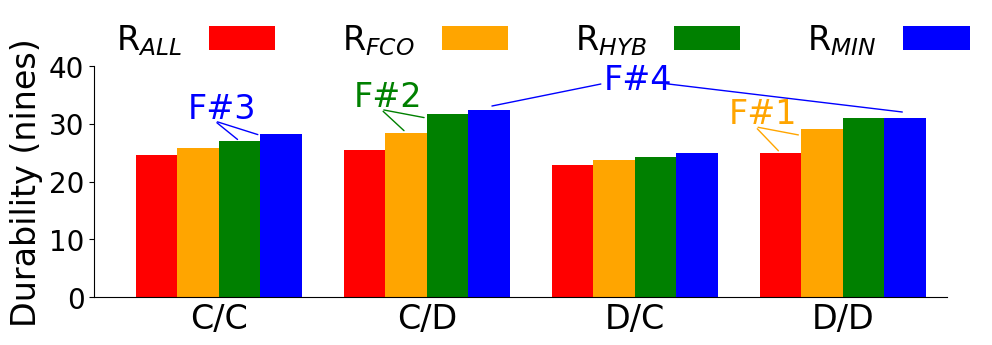

In [8]:
!mkdir -p plots/fig10
!python3 scripts/fig10/plot.py plots/fig10/fig10.png

from IPython.display import Image
Image(filename='plots/fig10/fig10.png', width=700)